<a href="https://colab.research.google.com/github/felipe24I/Signals-and-Systems-Felipe-Idarraga/blob/main/Signal_discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting AC Power Signal to Digital: Discretization and Quantization Process

I'll create a simulation that demonstrates how an electrical power signal (120V amplitude, 60Hz frequency) is processed through an Analog-to-Digital Converter (ADC) with 3-bit resolution. The conversion process involves scaling the input signal (0-10V range), sampling (discretization), and quantizing the samples to 8 discrete levels (2^3 = 8 levels for 3 bits).


#1. Discretizing the AC power signal (120V, 60Hz)

[0.         0.00033333 0.00066667 0.001      0.00133333 0.00166667
 0.002      0.00233333 0.00266667 0.003      0.00333333 0.00366667
 0.004      0.00433333 0.00466667 0.005      0.00533333 0.00566667
 0.006      0.00633333 0.00666667 0.007      0.00733333 0.00766667
 0.008      0.00833333 0.00866667 0.009      0.00933333 0.00966667
 0.01       0.01033333 0.01066667 0.011      0.01133333 0.01166667
 0.012      0.01233333 0.01266667 0.013      0.01333333 0.01366667
 0.014      0.01433333 0.01466667 0.015      0.01533333 0.01566667
 0.016      0.01633333 0.01666667 0.017      0.01733333 0.01766667
 0.018      0.01833333 0.01866667 0.019      0.01933333 0.01966667
 0.02       0.02033333 0.02066667 0.021      0.02133333 0.02166667
 0.022      0.02233333 0.02266667 0.023      0.02333333 0.02366667
 0.024      0.02433333 0.02466667 0.025      0.02533333 0.02566667
 0.026      0.02633333 0.02666667 0.027      0.02733333 0.02766667
 0.028      0.02833333 0.02866667 0.029      0.02933333 0.0296

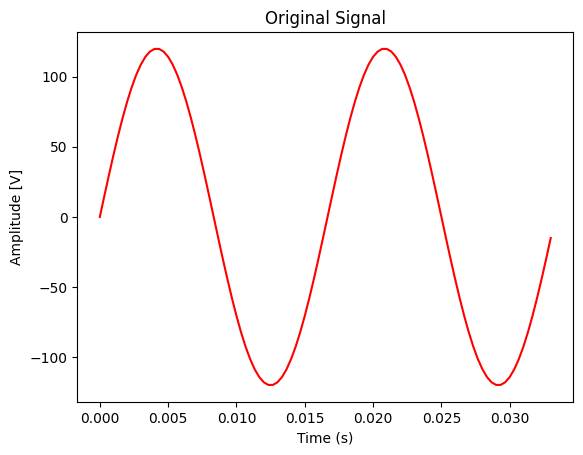

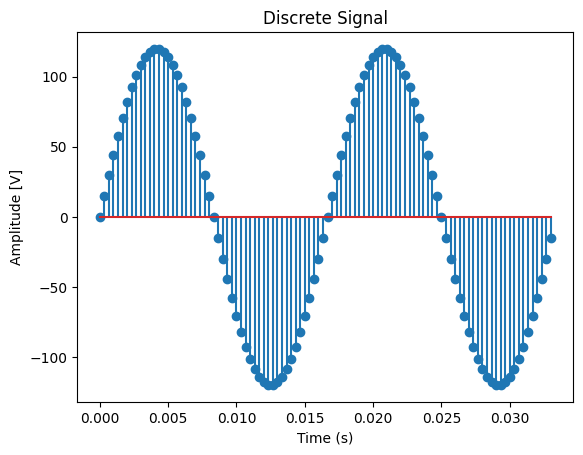

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Continuous signal parameters
A = 120       # amplitude
f = 60        # frequency
T = 1/f       # period

# Time discretization
t_start = 0                # start time
t_end = 2*T                # end time
f_sample = 50*f            # sampling frequency
t_sample = 1/f_sample      # sampling time

# Create discretized time vector
t_vector = np.arange(t_start, t_end, t_sample)
print(t_vector)
print(t_vector.shape)

# Discretize signal
x_vector = A*np.sin(2*np.pi*f*t_vector)
print(x_vector)
print(x_vector.shape)

#Plot Original signal
plt.plot(t_vector, x_vector, color= 'red')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
plt.show()

#Plot discrete signal
plt.stem(t_vector, x_vector)
plt.title('Discrete Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
plt.show()

#2. Scale the discrete signal to fit within ADC input range (0-10V)

[5.00000000e+00 5.62790520e+00 6.24590795e+00 6.84426199e+00
 7.41353092e+00 7.94473703e+00 8.42950287e+00 8.86018340e+00
 9.22998654e+00 9.53308026e+00 9.76468460e+00 9.92114701e+00
 1.00000000e+01 1.00000000e+01 9.92114701e+00 9.76468460e+00
 9.53308026e+00 9.22998654e+00 8.86018340e+00 8.42950287e+00
 7.94473703e+00 7.41353092e+00 6.84426199e+00 6.24590795e+00
 5.62790520e+00 5.00000000e+00 4.37209480e+00 3.75409205e+00
 3.15573801e+00 2.58646908e+00 2.05526297e+00 1.57049713e+00
 1.13981660e+00 7.70013460e-01 4.66919739e-01 2.35315402e-01
 7.88529869e-02 0.00000000e+00 0.00000000e+00 7.88529869e-02
 2.35315402e-01 4.66919739e-01 7.70013460e-01 1.13981660e+00
 1.57049713e+00 2.05526297e+00 2.58646908e+00 3.15573801e+00
 3.75409205e+00 4.37209480e+00 5.00000000e+00 5.62790520e+00
 6.24590795e+00 6.84426199e+00 7.41353092e+00 7.94473703e+00
 8.42950287e+00 8.86018340e+00 9.22998654e+00 9.53308026e+00
 9.76468460e+00 9.92114701e+00 1.00000000e+01 1.00000000e+01
 9.92114701e+00 9.764684

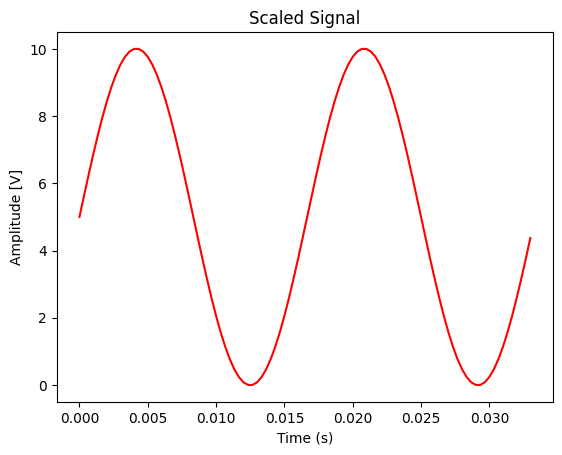

In [5]:
# Define the ADC voltage range
y_min = 0      # minimum voltage (0V)
y_max = 10     # maximum voltage (10V)

# Function to scale signal values to fit within the desired range
def scale_signal(x, y_min, y_max):
   """
   Scale an input signal to fit within a specified output range.

   Args:
       x: Input signal array
       y_min: Minimum value of the output range
       y_max: Maximum value of the output range

   Returns:
       Scaled signal within the specified range
   """
   x_min = np.min(x)
   x_max = np.max(x)
   m = (y_max - y_min) / (x_max - x_min)  # calculate slope
   b = y_min - m * x_min                  # calculate y-intercept
   y_vector = m * x + b                   # apply linear scaling
   return y_vector

# Scale the discretized AC signal to the 0-10V range
y_vector = scale_signal(x_vector, y_min, y_max)
print(y_vector)
print(y_vector.shape)

#Plot scaling signal
plt.plot(t_vector, y_vector, color= 'red')
plt.title('Scaled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
plt.show()


#3. Quantizing the sampled values to 3-bit resolution (8 levels)

[ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.        ]
(8,)
[ 4.28571429  5.71428571  5.71428571  7.14285714  7.14285714  8.57142857
  8.57142857  8.57142857  8.57142857 10.         10.         10.
 10.         10.         10.         10.         10.          8.57142857
  8.57142857  8.57142857  8.57142857  7.14285714  7.14285714  5.71428571
  5.71428571  5.71428571  4.28571429  4.28571429  2.85714286  2.85714286
  1.42857143  1.42857143  1.42857143  1.42857143  0.          0.
  0.          0.          0.          0.          0.          0.
  1.42857143  1.42857143  1.42857143  1.42857143  2.85714286  2.85714286
  4.28571429  4.28571429  4.28571429  5.71428571  5.71428571  7.14285714
  7.14285714  8.57142857  8.57142857  8.57142857  8.57142857 10.
 10.         10.         10.         10.         10.         10.
 10.          8.57142857  8.57142857  8.57142857  8.57142857  7.14285714
  7.14285714  5.71428571  5.71428571  5.71428571  4.28571429

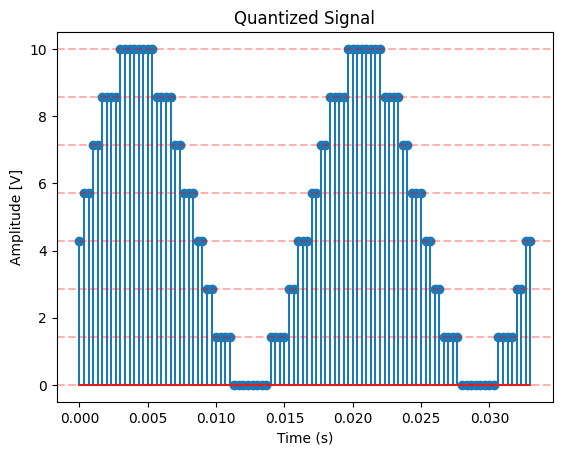

In [14]:
# Define the ADC resolution in bits
n_bits = 3                           # 3-bit ADC resolution
num_levels = 2**n_bits               # Calculate number of quantization levels (8 levels for 3 bits)
vector_levels = np.linspace(y_min, y_max, num_levels)  # Create evenly spaced quantization levels from y_min to y_max
print(vector_levels)                 # Display the quantization levels
print(vector_levels.shape)           # Display the shape of the levels array

def quantize_signal(y_vector, vector_levels):
    """
    Quantize an input signal to a specified set of discrete levels.

    This function uses the Euclidean distance to find the closest quantization
    level for each sample in the input signal.

    Args:
        y_vector: Input signal array to be quantized
        vector_levels: Array of available quantization levels

    Returns:
        Quantized signal with values matched to the nearest level
    """
    # Calculate Euclidean distances between each sample and each quantization level
    distances = cdist(y_vector.reshape(-1, 1), vector_levels.reshape(-1, 1))

    # For each sample, find the index of the closest quantization level
    closest_indices = np.argmin(distances, axis=1)

    # Use the indices to get the corresponding quantization levels
    quantized_signal = vector_levels[closest_indices]

    return quantized_signal

# Quantize the scaled signal to 3-bit resolution
quantized_signal = quantize_signal(y_vector, vector_levels)
print(quantized_signal)              # Display the quantized signal values
print(quantized_signal.shape)        # Display the shape of the quantized signal array

# Visualize the quantized signal using stem plot
plt.stem(t_vector, quantized_signal)  # Create stem plot (discrete points with lines to zero)
# Add horizontal lines for each quantization level
for level in vector_levels:
    plt.axhline(y=level, color='r', linestyle='--', alpha=0.3)  # Add a horizontal line at each quantization level
plt.title('Quantized Signal')         # Add plot title
plt.xlabel('Time (s)')                # Add x-axis label
plt.ylabel('Amplitude [V]')           # Add y-axis label
plt.show()                            # Display the plot